## 1. Data Preparation

In [904]:
# Reading the data and putting it into a table
import pandas as pd
df = pd.read_csv('dataset.csv')

# Dropping the irrelevant columns
df = df.drop('ProfileName', axis=1)
df = df.drop('HelpfulnessNumerator', axis=1)
df = df.drop('HelpfulnessDenominator', axis=1)
df = df.drop('Time', axis=1)
df

,Id,ProductId,UserId,Score,Summary,Text
0,2,B00813GRG4,A1D87F6ZCVE5NK,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
1,5,B006K2ZZ7K,A1UQRSCLF8GW1T,5,Great taffy,Great taffy at a great price. There was a wid...
2,10,B00171APVA,A21BT40VZCCYT4,5,Healthy Dog Food,This is a very healthy dog food. Good for thei...
3,17,B001GVISJM,A3KLWF6WQ5BNYO,2,poor taste,I love eating them and they are good for watch...
4,39,B001EO5QW8,A2GHZ2UTV2B0CD,4,GOOD WAY TO START THE DAY....,I WAS VISITING MY FRIEND NATE THE OTHER MORNIN...
...,...,...,...,...,...,...
30360,568383,B000H28ABW,A1TZXENU9QMGQE,5,Best buy 4 your money,I purchased a packet of the taco seasoning and...
30361,568405,B005OTVL8C,A1UJMVE0LCOI45,5,great flavor boost,If you want to add a hint of Meyer lemon flavo...
30362,568415,B0002ARMS6,ALMANY3CKWVH7,5,Exotic food,This is always a good product for Exotic Cats....
30363,568420,B001F2GDJY,A2IN568FEHYSQ8,5,really works!,I have been using this product for two years n...


In [905]:
# Function to assign labels depending on the Score value
def annotate (row):
    if row['Score'] == 4:
        return 'pos'
    if row['Score'] == 5:
        return 'pos'
    if row['Score'] == 1:
        return 'neg'
    if row['Score'] == 2:
        return 'neg'
    if row['Score'] == 3:
        return
    
# Applying the function to the dataframe
df['Label'] = df.apply(annotate, axis=1)

# Dropping the rows with score 3
df.drop(df[df.Score == 3].index, inplace=True)
df

,Id,ProductId,UserId,Score,Summary,Text,Label
0,2,B00813GRG4,A1D87F6ZCVE5NK,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,neg
1,5,B006K2ZZ7K,A1UQRSCLF8GW1T,5,Great taffy,Great taffy at a great price. There was a wid...,pos
2,10,B00171APVA,A21BT40VZCCYT4,5,Healthy Dog Food,This is a very healthy dog food. Good for thei...,pos
3,17,B001GVISJM,A3KLWF6WQ5BNYO,2,poor taste,I love eating them and they are good for watch...,neg
4,39,B001EO5QW8,A2GHZ2UTV2B0CD,4,GOOD WAY TO START THE DAY....,I WAS VISITING MY FRIEND NATE THE OTHER MORNIN...,pos
...,...,...,...,...,...,...,...
30360,568383,B000H28ABW,A1TZXENU9QMGQE,5,Best buy 4 your money,I purchased a packet of the taco seasoning and...,pos
30361,568405,B005OTVL8C,A1UJMVE0LCOI45,5,great flavor boost,If you want to add a hint of Meyer lemon flavo...,pos
30362,568415,B0002ARMS6,ALMANY3CKWVH7,5,Exotic food,This is always a good product for Exotic Cats....,pos
30363,568420,B001F2GDJY,A2IN568FEHYSQ8,5,really works!,I have been using this product for two years n...,pos


In [906]:
df.describe()

,Id,Score
count,28054.000000,28054.000000
mean,265010.744885,4.233122
std,166710.612339,1.373777
min,2.000000,1.000000
25%,114602.500000,4.000000
50%,254278.500000,5.000000
75%,410060.250000,5.000000
max,568421.000000,5.000000


In [907]:
df.Label.value_counts()

pos    23228
neg     4826
Name: Label, dtype: int64

There are 23228 positive reviews and 4826 negative reviews in the dataset, so considerably more positive reviews than the negative ones.

## 2. Data Cleaning

In [908]:
df.loc[5, 'Text']

"This wasn't in stock the last time I looked. I had to go to the Vermont Country Store in Weston to find it along with a jaw harp, Cranberry Horseradish Sauce, Fartless Black Bean Salsa, Apple Cider Jelly, Newton's Cradle Art in Motion and the staple Vermont Maple Syrup.<br /><br />Back to the Ass Kickin Peanuts. They are hot. They will activate the perspiration glands behind your ears and under your arms. It requires a beverage as advertised, a glass of very cold milk, and a box of Kleenex since it will make your nose run. They look like ordinary peanuts which is already giving me ideas for work. I suspect that some people have been hitting my goodies in my absence, especially my colleague Greg. I'm going to take this to work at earliest opportunity and empty the contents of this can into an ordinary Planters Peanuts can, and then see whose crying or whose nose is running when I return.<br /><br />The can should be shaken to ensure the spices are evenly distributed. It is important to

In [909]:
df.loc[47, 'Text']

"This may sound rediculous, but I actually ordered the wrong brand of potato chips when I ordered these Kettle-brand jalapeno chips.  At the time I placed my order, I couldn't remember the name of the jalapeno chips that I had recently discovered and liked, and the Kettle-brand chips were packaged in a similarly-colored bag.  But, it all worked out for the best because I do really like the Kettle-brand of jalapeno chips, and will happily munch away on them during upcoming TV football games.  When I run out (probably sometime next year!), I will likey purchase Miss Vicky brand of jalapeno chips, and I plan to try the other flavors of Kettle-brand chips.  Imho, Kettle-brand chips are excellent and I recommend them to all potato chip 'affection-ados'.<br /><br />Sincerely,<br /><br />  § homiedog §"

We can see from the above two text examples that there are a lot of unusual characters in the text, such as '\<br />\' and '§'. These unusual characters are irrelevant elements to the sentiment anaylsis and should be removed to improve the training accuracy of the model. To do so, we can write a function that can be applied to the text. The function will use regex to detect certain unusual elements that we want to remove from the text.

In [910]:
import re

# Function to clean the review text using regex
def clean_text(text):
    
    # Regex for removing hyperlinks
    text = re.sub(r"https:[\S]+", " ", text)
    
    # Regex for removing break rows
    text = re.sub(r"<br\s*[\/]?>", " ", text)
    
    # Regex for removing new line characters (\n)
    text = re.sub(r"\\n"," ", text)
    
    # Regex for removing unusual characters
    text = re.sub(r"[^A-Za-z*'-]+", " ", text)
    
    # Regex for removing hashtags
    text = re.sub(r"#[\S]+", " ", text)
    
    # Regex for removing @-mentions
    text = re.sub(r"@[\S]+", " ", text)
    
    # Converting each alphabet of the text to lowercase
    text = text.lower().strip()
    
    return text

In [911]:
df["Text"] = df["Text"].apply(clean_text)
df.loc[5, 'Text']

"this wasn't in stock the last time i looked i had to go to the vermont country store in weston to find it along with a jaw harp cranberry horseradish sauce fartless black bean salsa apple cider jelly newton's cradle art in motion and the staple vermont maple syrup back to the ass kickin peanuts they are hot they will activate the perspiration glands behind your ears and under your arms it requires a beverage as advertised a glass of very cold milk and a box of kleenex since it will make your nose run they look like ordinary peanuts which is already giving me ideas for work i suspect that some people have been hitting my goodies in my absence especially my colleague greg i'm going to take this to work at earliest opportunity and empty the contents of this can into an ordinary planters peanuts can and then see whose crying or whose nose is running when i return the can should be shaken to ensure the spices are evenly distributed it is important to wash your hands after consumption and n

In [912]:
df.loc[47, 'Text']

"this may sound rediculous but i actually ordered the wrong brand of potato chips when i ordered these kettle-brand jalapeno chips at the time i placed my order i couldn't remember the name of the jalapeno chips that i had recently discovered and liked and the kettle-brand chips were packaged in a similarly-colored bag but it all worked out for the best because i do really like the kettle-brand of jalapeno chips and will happily munch away on them during upcoming tv football games when i run out probably sometime next year i will likey purchase miss vicky brand of jalapeno chips and i plan to try the other flavors of kettle-brand chips imho kettle-brand chips are excellent and i recommend them to all potato chip 'affection-ados' sincerely homiedog"

## 3. Building a Logistic Regression Text Classifier

In [913]:
import numpy as np
from sklearn.model_selection import train_test_split

# Random state is applied to make the data reproducible.
random_state = np.random.RandomState(0)

In [914]:
# X will be the independent variable, and y will be the dependent variable.
X = df["Text"]
y = df["Label"]

# Split the data to two, where 70% will be used for training, and 30% will be used for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=random_state)

In [915]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend([
    'browser', 
    'firefox', 
    'focus', 
    'tea',
    'make',
    'app', 
    'amazon', 
    'one', 
    'taste', 
    'product', 
    'flavor',
    'coffee',
    'would'
])

[nltk_data] Downloading package stopwords to C:\Users\Johanes
[nltk_data]     Steven\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [916]:
# Initialize an instance of the CountVectorizer object
# The vectorizer will exclude words that occur in only 1% of reviews.
vectorizer = CountVectorizer(stop_words=stop_words, min_df=0.01)

# Fit the training dataset and the vectorizer.
vectorizer.fit(X_train)

# Vectorizer is used to get the BOW (Bag of Words) that represent the text in numerical form so that-
# logistic regression can handle them.
X_train_BOW = vectorizer.transform(X_train)

# We can visualize the BOW into a dataframe so that we can see them
training_data_BOW = pd.DataFrame(data=X_train_BOW.toarray(), columns=vectorizer.get_feature_names()).T
training_data_BOW

,0,1,2,3,4,5,6,7,8,9,...,19627,19628,19629,19630,19631,19632,19633,19634,19635,19636
able,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
absolutely,0,0,0,0,0,0,0,0,0,0,...,0,0,3,0,0,0,0,0,0,0
actually,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
add,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
added,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
year,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
years,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
yes,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
yet,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [917]:
# Identifying which value is most common in the training dataset.
y_train.value_counts()

pos    16234
neg     3403
Name: Label, dtype: int64

In [918]:
# Create the baseline predictions which only contains the most common value, which is 'pos'
y_test_baseline_predictions = pd.Series(['pos']*len(y_test))

In [919]:
from sklearn.linear_model import LogisticRegression
# Creating an instance of Logistic Regression object.
log_reg = LogisticRegression(random_state=random_state, max_iter=1000)

# Fitting the created model to the training dataset
log_reg.fit(X_train_BOW, y_train)

LogisticRegression(max_iter=1000,
                   random_state=RandomState(MT19937) at 0x23842305640)

In [920]:
# Using the model to predict the test dataset.
# Creating the BOW for the test dataset.
X_test_BOW = vectorizer.transform(X_test)

# The Logistic Regression object is used to predict the values of the dependent variable of the test dataset.
y_test_log_reg_predictions = log_reg.predict(X_test_BOW)

# We can look at the predicted values in array form.
y_test_log_reg_predictions

array(['pos', 'pos', 'pos', ..., 'pos', 'pos', 'pos'], dtype=object)

### Build a logistic regression text classifier to categorise whether review has positive or negative sentiment. 70% of the reviews should be used for training and the remaining 30% for the testing. List the steps taken in your own words to build the model in less than 4 lines.

The model is trained using 70% of the overall data, while the 30% will be used to test the prediction of the model (the split is done using train_test_split). We then need to transform the independent variables of the training dataset and test dataset into a numerical value that can be handled by logistic regression (in this case we are using BOW from the CountVectorizer). The BOW is then fit into an instance of LogisticRegression. The resulting Logistic Regression model is then used to predict the values of the test dataset.

## Data Analysis

In [921]:
# Calculating the accuracy of the baseline predictions (All 'pos')
from sklearn.metrics import accuracy_score
baseline_accuracy = accuracy_score(y_test, y_test_baseline_predictions)

In [922]:
# Calculating the accuracy of the LogisticRegression model that we have created
model_accuracy = accuracy_score(y_test, y_test_log_reg_predictions)

Confusion matrix for baseline model:


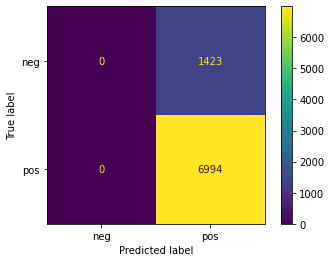

In [923]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test, y_test_baseline_predictions)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
print("Confusion matrix for baseline model:")
display.plot();

Confusion matrix for logisticregression model:


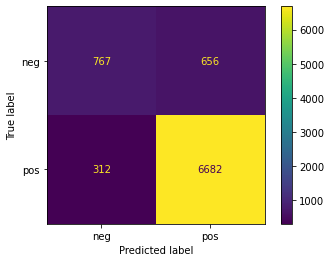

In [924]:
cm = confusion_matrix(y_test, y_test_log_reg_predictions)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
print("Confusion matrix for logisticregression model:")
display.plot();

In [925]:
from sklearn.metrics import precision_score

# Calculate precision for the baseline prediction (only for the negative)
# Zero_division warning is turned off, because there are no True Negatives and no False Negatives (divisor is zero)
baseline_precision = precision_score(y_test, y_test_baseline_predictions, pos_label='neg', zero_division=0)

In [926]:
# Calculate precision for the baseline prediction (only for the negative)
model_precision = precision_score(y_test, y_test_log_reg_predictions, pos_label='neg', zero_division=0)

In [927]:
from sklearn.metrics import recall_score

# Calculate recall score for the baseline prediction (only for the negative)
baseline_recall = recall_score(y_test, y_test_baseline_predictions, pos_label='neg')

In [928]:
# Calculate recall score for the model prediction (only for the negative)
model_recall = recall_score(y_test, y_test_log_reg_predictions, pos_label='neg')

In [929]:
from sklearn.metrics import f1_score

# Calculate F1 score for the baseline prediction (only for the negative)
baseline_f1 = f1_score(y_test, y_test_baseline_predictions, pos_label='neg')

In [930]:
# Calculate F1 score for the model prediction (only for the negative)
model_f1 = f1_score(y_test, y_test_log_reg_predictions, pos_label='neg')

In [931]:
print("Baseline: {‘accuracy’:%1.2f, ‘precision’:%1.2f, ’recall’:%1.2f, ‘f1-score’:%1.2f}" % (baseline_accuracy, baseline_precision, baseline_recall, baseline_f1))
print("LogisticRegression: {‘accuracy’:%1.2f, ‘precision’:%1.2f, ’recall’:%1.2f, ‘f1-score’:%1.2f}" % (model_accuracy, model_precision, model_recall, model_f1))

Baseline: {‘accuracy’:0.83, ‘precision’:0.00, ’recall’:0.00, ‘f1-score’:0.00}
LogisticRegression: {‘accuracy’:0.88, ‘precision’:0.71, ’recall’:0.54, ‘f1-score’:0.61}


### Explain the cause of difference between the accuracy and the f1 score of the negative class for the baseline model.

Accuracy is the measure of how much correct predictions the model makes out of all predictions. In this case, the baseline model makes a lot of accurate predictions because they are all set to the positive and the original data is heavily skewed towards the positive. The F1 score however depends on the recall and the precision. Since the precision and the recall of the negative class of the baseline model are 0 (no negatives on the baseline), therefore the F1 score of the negative class of the baseline model is 0, which will result in a much different value compared to the accuracy.

In [932]:
# Applying the model to predict the data in predictdata.csv
df2 = pd.read_csv('predictdata.csv')
df2["Text"] = df2["Text"].apply(clean_text)
X_test_BOW = vectorizer.transform(df2["Text"])

df2['Model Prediction'] = log_reg.predict(X_test_BOW)
df2

,Id,Text,Model Prediction
0,1,the candy is tasty but they totally scam you o...,neg
1,2,i had been looking for the violet candy with t...,pos
2,3,these are very pricey so i only enjoy them now...,pos
3,4,these candies have a mild flavor when compared...,pos
4,5,this product is a bit pricey for the amt recei...,pos


In [933]:
!pip install wordcloud
from wordcloud import WordCloud
from matplotlib import pyplot as plt

# function adapted from https://aneesha.medium.com/visualising-top-features-in-linear-svm-with-scikit-learn-and-matplotlib-3454ab18a14d
def plot_coefficients(classifier, feature_names, top_features=10):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    # create plot
    plt.figure(figsize=(15, 5))
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(0, 2 * top_features), feature_names[top_coefficients], rotation=90, ha='right')
    plt.xlabel("Important Words")
    plt.ylabel("Model Coefficient")
    plt.title("Important words with their model coefficient")
    plt.show()

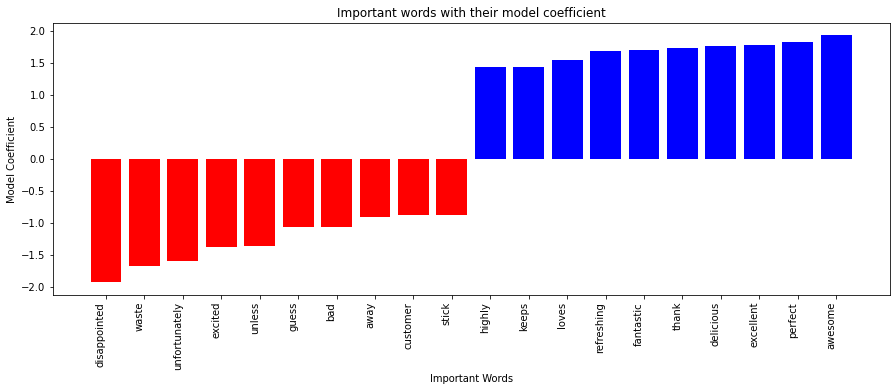

In [934]:
plot_coefficients(log_reg, vectorizer.get_feature_names())

The above words show that some of the words that play the most significant role in deciding a positive review are 'awesome', 'perfect' and 'excellent', while some of the words that play the most significant role in deciding a negative review are 'disappointed', 'waste', and 'unfortunately'.

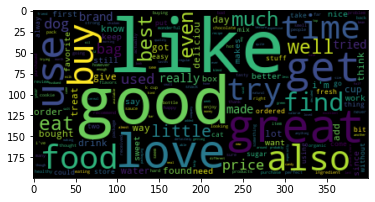

In [935]:
text = " ".join(X_train)
word_cloud = WordCloud(stopwords=set(stop_words)).generate(text)
plt.imshow(word_cloud, interpolation='bilinear');

The word cloud shows that the most common words include 'like', 'love', and 'good'. These words have positive connotations and is most likely to be common due to the data's skewness towards positive reviews.

### Write in three lines with your own words about classification with unbalanced data. What is the issue with unbalanced data and how you could handle it in a better way (you don’t need to implement your solution)? Provide the issue with imbalanced classification and your suggestion in less than 4 sentences that reader can understand clearly using research fromthe internet resources. 
The issue with imbalanced data is that it causes bias in the model towards the dominant value (meaning that the model will be more likely to predict 'pos' in this case). Some of the easiest ways to handle this issue is to use oversampling (meaning multiplying the lesser value, 'neg' in this case, so that it is closer to the dominant value in number) or undersampling (meaning to lessen the dominant value in number, so that it is closer to the lesser value in number). Both of these methods aim to lessen the gap between dominant and lesser values to more 'balance' the data.